In [133]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('classic')

In [134]:
#definisi fungsi 
l = 0.0001050223 #lambda
def returns_dydt(y, t):
    Bf, Bs, L, HW, K, Llf, Lls, Of, Os, P, E = y
    dydt = [(-l * Bf -(k4+k5)*Bf + k6 * Bs + k3 * P), (-l * Bs -k6 * Bs + k5 * Bf), (-l * L -k8 * L + k7 * P), (-l * HW -k10 * HW + k9 * P), (-l * K -k12 * K + k11 * P), (-l * Llf -(k14+k15) * Llf + k13 * P), (-l * Lls + k15 * Llf), (-l * Of -(k17+k18) * Of + k16 * P), (-l * Os + k18 * Of), (-l * P -(k1+k3+k7+k9+k11+k13+k16) * P + k2 * E + k4 * Bf + k8 * L + k10 * HW + k12 * K + k14 * Llf + k17 * Of), (-l * E -k2 * E + k1 * P)]
    return dydt


In [135]:
#Definisi variabel
y0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0]
k1 = 5.82e-2 * 0.01
k2= 1.16e-1 * 0.01
k3 = 6.12e-2 * 0.01
k4 = 1.30e-2* 0.01
k5 = 6.62e-2* 0.01
k6 = 9.57e-4* 0.01
k7 = 7.2e-4* 0.01
k8 = 6.46e-4* 0.01
k9 = 1.72e-4* 0.01
k10 = 1.16e-7* 0.01
k11 = 7.57e-4* 0.01
k12 = 2.26e-2* 0.01
k13 = 1.72e-2* 0.01
k14 = 2.19e-2* 0.01
k15 = 1.2e-6* 0.01
k16 = 1.32* 0.01
k17 = 2.76* 0.01
k18 = 3.62e-3* 0.01
dt = 0.01
t = 300 * 60


In [136]:
#fungsi waktu
time = np.linspace(0,t,int(t/dt)+1)

In [137]:
#Hasil fungsi
y = np.transpose(odeint(returns_dydt, y0, time))

In [138]:
print(len(time))

1800001


In [139]:
print(np.shape(y))

(11, 1800001)


In [140]:
print(y)

[[0.00000000e+00 6.11952322e-04 1.22380930e-03 ... 3.78897845e-01
  3.78897207e-01 3.78896569e-01]
 [0.00000000e+00 2.02552603e-09 8.10186822e-09 ... 1.31025209e+01
  1.31025084e+01 1.31024959e+01]
 [0.00000000e+00 7.19946736e-06 1.43978696e-05 ... 1.76304249e-01
  1.76304070e-01 1.76303891e-01]
 ...
 [0.00000000e+00 2.38858009e-09 9.55356688e-09 ... 4.62305647e-01
  4.62305204e-01 4.62304761e-01]
 [1.00000000e+02 9.99853154e+01 9.99706366e+01 ... 2.46194426e-01
  2.46193895e-01 2.46193365e-01]
 [0.00000000e+00 5.81953589e-04 1.16381437e-03 ... 1.36970814e-01
  1.36970515e-01 1.36970215e-01]]


Text(0.5, 0, 'time')

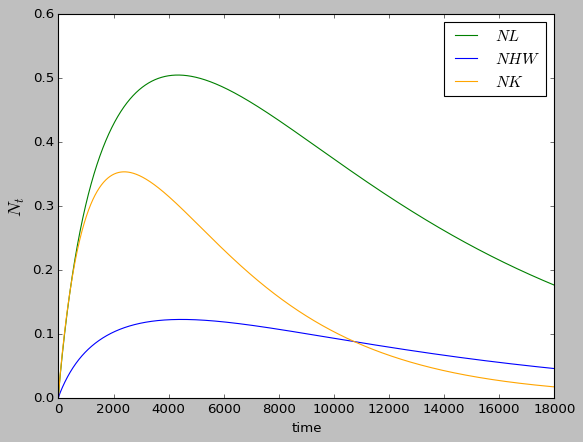

In [141]:
#fastbrain
#plt.plot(time,y[0,:],color='red')
#slowbrain
#plt.plot(time,y[1,:],color='red')
#lungs
plt.plot(time,y[2,:],color='green')
#heartwall
plt.plot(time,y[3,:],color='blue')
#kidney
plt.plot(time,y[4,:],color='orange')
#fastliver
#plt.plot(time,y[5,:])
#slowliver
#plt.plot(time,y[6,:])
#fastothercompartment
#plt.plot(time,y[7,:])
#slow other compertment
#plt.plot(time,y[8,:])
#plasma
#plt.plot(time,y[9,:])
#erythrocytes
#plt.plot(time,y[10,:])
#Otak gabungan 
#plt.plot(time,y[0,:]+y[1,:],color='black')
#plt.legend(('$NB_f$','$NB_s$','$NL$','$NHW$', '$NK$','$NLl_f$','$NLl_s$','$NO_f$','$NO_s$','$NP$','$NE$'))
plt.legend(('$NL$','$NHW$', '$NK$'))
plt.ylabel('$N_t$',fontsize=16)
plt.xlabel('time')

In [142]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('classic')

In [143]:
#definisi fungsi 
def returns_dydt(y, t):
    Bf, Bs, L, HW, K, Llf, Lls, Of, Os, P, E = y
    dydt = [(-(k4+k5)*Bf + k6 * Bs + k3 * P), (-k6 * Bs + k5 * Bf), (-k8 * L + k7 * P), (-k10 * HW + k9 * P), (-k12 * K + k11 * P), (-(k14+k15) * Llf + k13 * P), (k15 * Llf), (-(k17+k18) * Of + k16 * P), (k18 * Of), (-(k1+k3+k7+k9+k11+k13+k16) * P + k2 * E + k4 * Bf + k8 * L + k10 * HW + k12 * K + k14 * Llf + k17 * Of), (-k2 * E + k1 * P)]
    return dydt

In [144]:
#Definisi variabel
y0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0]
k1 = 5.82e-2 * 0.01
k2= 1.16e-1 * 0.01
k3 = 6.12e-2 * 0.01
k4 = 1.30e-2* 0.01
k5 = 6.62e-2* 0.01
k6 = 9.57e-4* 0.01
k7 = 7.2e-4* 0.01
k8 = 6.46e-4* 0.01
k9 = 1.72e-4* 0.01
k10 = 1.16e-7* 0.01
k11 = 7.57e-4* 0.01
k12 = 2.26e-2* 0.01
k13 = 1.72e-2* 0.01
k14 = 2.19e-2* 0.01
k15 = 1.2e-6* 0.01
k16 = 1.32* 0.01
k17 = 2.76* 0.01
k18 = 3.62e-3* 0.01
dt = 0.01
t = 300 * 60

In [145]:
#fungsi waktu
time = np.linspace(0,t,int(t/dt)+1)

In [146]:
#Hasil fungsi
y = np.transpose(odeint(returns_dydt, y0, time))

In [188]:
#persamaan perkalian sample
#konstanta 
a = 0.6
b = np.exp(-np.log(2)*(time/(110*60))) #half life
q1 = y[9,:] #Plasma
q2 = y[10,:] #Eritrosit
q3 = y[3,:] #Heart Wall
q4 = y[2,:] #Lungs
q5 = y[0,:] #Fast brain
q6 = y[1,:] #Slow brain
q7 = y[4,:] #Kidneys
q8 = y[5,:] #Fast liver
q9 = y[6,:] #Slow liver

#heart wall
s1 = (q3 +(q1+ q2)*0.031)*b

#lungs
s2 = (q4 + ((1-a)*q2 + a*q1)*0.03)*b

#brain
s3 = ((q5+q6)+0.135*(a*q1+(1-a)*q2))*b

#kidney
s4 = (q7)*b

#liver
s5 = ((q2 + q1)* 0.098+ q8+q9)*b



In [189]:
df = pd.read_excel('Data plotting paper.xlsx', sheet_name='Sheet3')

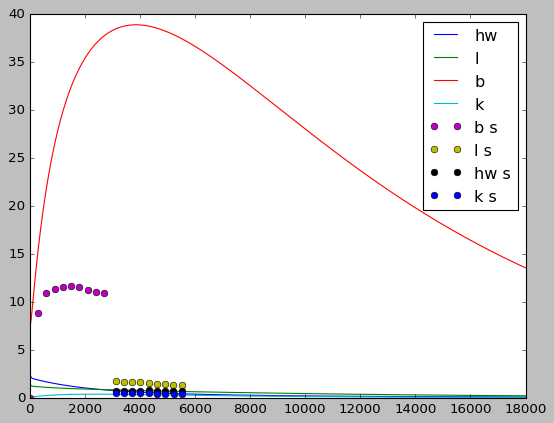

In [203]:
plt.plot(time,s1)
plt.plot(time,s2)
plt.plot(time,s3)
plt.plot(time,s4)
plt.plot(df['xb']*60,df['yb'], 'o')
plt.plot(df['xl']*60,df['yl'], 'o')
plt.plot(df['xhw']*60,df['yhw'], 'o')
plt.plot(df['xk']*60,df['yk'], 'o')
#plt.plot(time,s5)
plt.legend(('hw', 'l', 'b', 'k', 'b s', 'l s', 'hw s', 'k s'))

In [191]:
print(np.exp(-np.log(2)*(time/(110*60))))

[1.         0.99999895 0.9999979  ... 0.1510115  0.15101134 0.15101118]


In [192]:
#persamaan tanpa konstanta b
#heart
s11 = (q3 +(q1+ q2)*0.031)

#lungs
s21 = (q4 + ((1-a)*q2 + a*q1)*0.03)

#brain
s31 = ((q5+q6)*0.135*(a*q1+(1-a)*q2))

#kidney
s41 = (q7)

#liver
s51 = ((q2 + q1)* 0.098+ q8+q9)

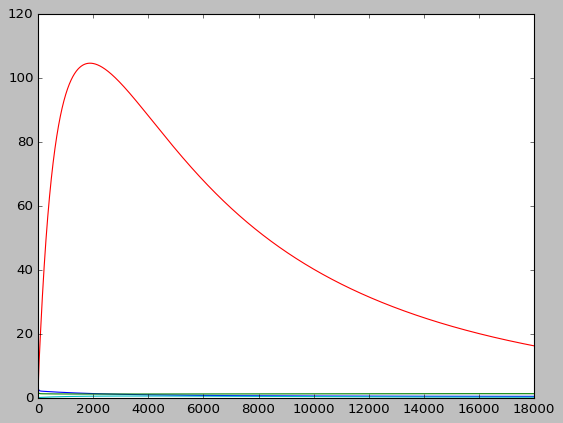

In [193]:
plt.plot(time,s11)
plt.plot(time,s21)
plt.plot(time,s31)
plt.plot(time,s41)
#plt.plot(time,s51)

In [194]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('classic')

In [195]:
#definisi fungsi 
def returns_dydt(y, t):
    Bf, Bs, L, HW, K, Llf, Lls, Of, Os, P, E = y
    dydt = [(-(k4+k5)*Bf + k6 * Bs + k3 * P), (-k6 * Bs + k5 * Bf), (-k8 * L + k7 * P), (-k10 * HW + k9 * P), (-k12 * K + k11 * P), (-(k14+k15) * Llf + k13 * P), (k15 * Llf), (-(k17+k18) * Of + k16 * P), (k18 * Of), (-(k1+k3+k7+k9+k11+k13+k16) * P + k2 * E + k4 * Bf + k8 * L + k10 * HW + k12 * K + k14 * Llf + k17 * Of), (-k2 * E + k1 * P)]
    return dydt

In [196]:
#Definisi variabel
y0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0]
k1 = 5.82e-2 * 0.01
k2= 1.16e-1 * 0.01
k3 = 6.12e-2 * 0.01
k4 = 1.30e-2* 0.01
k5 = 6.62e-2* 0.01
k6 = 9.57e-4* 0.01
k7 = 7.2e-4* 0.01
k8 = 6.46e-4* 0.01
k9 = 1.72e-4* 0.01
k10 = 1.16e-7* 0.01
k11 = 7.57e-4* 0.01
k12 = 2.26e-2* 0.01
k13 = 1.72e-2* 0.01
k14 = 2.19e-2* 0.01
k15 = 1.2e-6* 0.01
k16 = 1.32* 0.01
k17 = 2.76* 0.01
k18 = 3.62e-3* 0.01
dt = 0.01
t = 300 * 60

In [197]:
#fungsi waktu
time = np.linspace(0,t,int(t/dt)+1)

In [198]:
#Hasil fungsi
y = np.transpose(odeint(returns_dydt, y0, time))

In [199]:
a = 0.6

#heart
s12 = (y[3,:]+(y[9,:]+y[10,:])*0.031)*np.exp(-np.log(2)*(time/(110*60)))

#lungs
s22 = (y[2,:]+((1-a)*y[10,:]+a*y[9,:])*0.03)*np.exp(-np.log(2)*(time/(110*60)))

#brain
s32 = ((y[0,:]+y[1,:])*0.135*(a*y[9,:]+(1-a)*y[10,:]))*np.exp(-np.log(2)*(time/(110*60)))

#kidney
s42 = (y[4,:])*np.exp(-np.log(2)*(time/(110*60)))

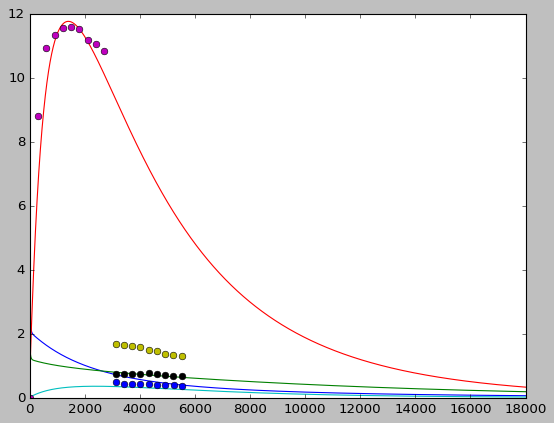

In [200]:
plt.plot(time,s12)
plt.plot(time,s22)
plt.plot(time,s32*12/90)
plt.plot(time,s42)
plt.plot(df['xb']*60,df['yb'], 'o')
plt.plot(df['xl']*60,df['yl'], 'o')
plt.plot(df['xhw']*60,df['yhw'], 'o')
plt.plot(df['xk']*60,df['yk'], 'o')